<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc" size=6>
بررسی تاثیر تخفیف روی تعداد فروش
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>مرحله اول:  </b></span>
    لایبرری‌های لازم را
    <code>import</code>
    می‌کنیم.
</font>
</p>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>مرحله دوم:  </b></span>
    داده‌های لازم را به دو دسته تخفیف‌دار و غیر تخفیف‌دار تقسیم می‌کنیم.
</font>
</p>

In [2]:
df = pd.read_csv("./facts.csv")
df

,Order ID,Customer ID,Order Priority,Row ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,Ship Mode,returned,Ship_Date_ID,Order_Date_ID,Geography_ID
0,CA-2012-124891,RH-19495,Critical,32298,TEC-AC-10003033,2309.650,7,0.0,762.1850,933.570,Same Day,0.0,20120731,20120731,NNUE-21043
1,CA-2012-124891,RH-19495,Critical,32299,FUR-TA-10002903,1090.780,7,0.4,-290.8750,348.180,Same Day,0.0,20120731,20120731,NNUE-21043
2,CA-2012-124891,RH-19495,Critical,32300,OFF-PA-10004621,19.440,3,0.0,9.3312,7.240,Same Day,0.0,20120731,20120731,NNUE-21043
3,IN-2013-77878,JR-16210,Critical,26339,TEC-CO-10000660,344.682,2,0.1,34.4220,65.350,Second Class,1.0,20130207,20130205,WNAO-21044
4,IN-2013-77878,JR-16210,Critical,26340,OFF-ST-10001366,133.920,5,0.1,-6.0300,41.640,Second Class,1.0,20130207,20130205,WNAO-21044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,ZI-2011-4350,AS-285,Medium,46231,OFF-SAN-10001862,9.612,2,0.7,-21.1680,0.020,Standard Class,0.0,20110326,20110321,HHZA-46071
49666,MX-2014-169530,HG-15025,High,6039,OFF-PA-10002418,84.000,5,0.0,9.2000,0.019,First Class,0.0,20140611,20140609,BSBS-46072
49667,IN-2014-72327,KH-16330,High,24105,OFF-PA-10000215,26.940,2,0.0,1.8600,0.010,Same Day,0.0,20140530,20140530,LUIC-46073
49668,IN-2014-57662,DB-13270,Medium,24175,OFF-BI-10002424,58.050,5,0.1,19.9500,0.010,Standard Class,0.0,20140810,20140805,TQAO-46074


In [3]:
x = list(df[df.Discount == 0]["Quantity"])
y = list(df[df.Discount != 0]["Quantity"])

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>مرحله سوم:  </b></span>
    نمودار مربوط به توزیع هر دسته را رسم می‌کنیم و سپس میانگین هر دسته را بررسی می‌کنیم.
</font>
</p>

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

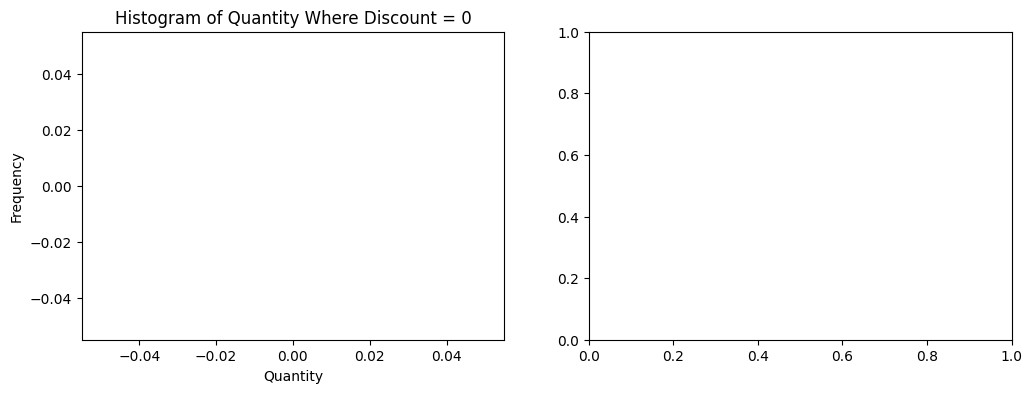

In [4]:
fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, facecolor='white')

ax[0].set_title("Histogram of Quantity Where Discount = 0")
ax[0].set_xlabel("Quantity")
ax[0].set_ylabel("Frequency")
sns.histplot(x, bins= 14, kde=True, ax=ax[0])

ax[1].set_title("Histogram of Quantity Where Discount != 0")
ax[1].set_xlabel("Quantity")
ax[1].set_ylabel("Frequency")
sns.histplot(y, bins= 14, kde=True, ax=ax[1])

plt.tight_layout()
plt.show()

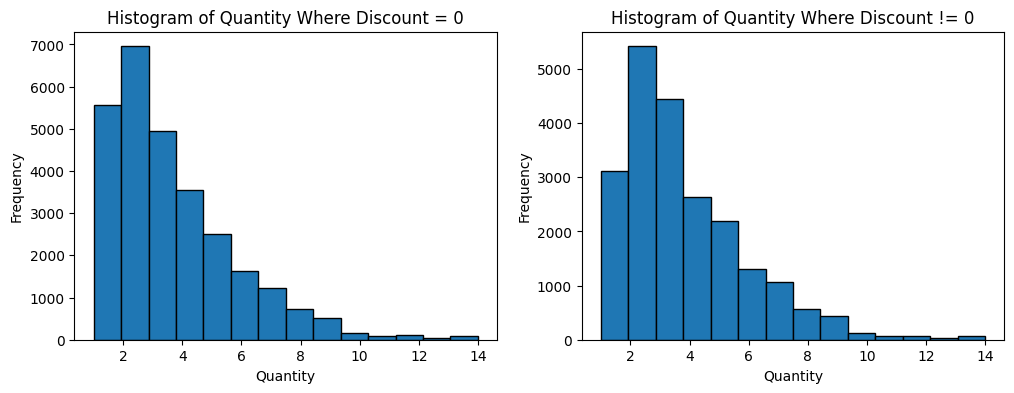

In [5]:
fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, facecolor='white')
ax[0].hist(x, bins=14, edgecolor='black')
ax[0].set_title("Histogram of Quantity Where Discount = 0")
ax[0].set_xlabel("Quantity")
ax[0].set_ylabel("Frequency")
    
ax[1].hist(y, bins= 14, edgecolor='black')
ax[1].set_title("Histogram of Quantity Where Discount != 0")
ax[1].set_xlabel("Quantity")
ax[1].set_ylabel("Frequency")

plt.show()

In [6]:
x = np.array(x)
y = np.array(y)
print(x.mean())
print(y.mean())

3.3957940433405684
3.5685074419251634


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>مرحله چهارم:  </b></span>
    حال با بررسی نمودار و میانگین‌ها می‌بینیم که در دسته تخفیف‌دارها به صورت میانگین تعداد فروش ببیشتر است. حال با استفاده از آزمون ttest بررسی می‌کنیم چقدر امکان وجود دارد که توزیع دو دسته یکسان باشد ولی همچین داده‌هایی به وجود بیاید.
</font>
</p>

In [7]:
x_n = len(x)
y_n = len(y)
x_m = x.mean()
y_m = y.mean()
std_x = math.sqrt(((x-x_m)**2).sum()/(x_n-1))
std_y = math.sqrt(((y-y_m)**2).sum()/(y_n-1))
sp = math.sqrt(((x_n-1)*(std_x**2)+(y_n-1)*(std_y**2))/(x_n+y_n-2))
t_value = (x_m-y_m)/(sp*math.sqrt((1/x_n)+(1/y_n)))
print(t_value)

-8.39266716365362


In [8]:
print(st.t.interval(0.999999999999999, df=x_n+y_n-2, loc=0, scale=1))

(-8.029601411475701, 8.044058509206634)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:purple"><b>نتیجه:  </b></span>
    با توجه به آزمون ttest انجام شده، متوجه شدیم که با احتمال تقریبا نزدیک به یک می‌توانیم بگوییم در دسته کالا‌های تخفیف‌دار میزان تعداد فروش بیشتر است.
</font>
</p>